In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score #분류성능평가지도
from sklearn.preprocessing import LabelEncoder #데이터전처리


In [3]:
train = pd.read_csv('./train.csv')
train

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,1,0.526546,2022-09-08 14:30,T100306,T_31,2.0,95.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,NaN,NaN,NaN,NaN,...,49.47,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN
595,TRAIN_595,0,0.521289,2022-09-08 22:47,T050304,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
596,TRAIN_596,1,0.531375,2022-09-08 14:38,T100304,O_31,40.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Columns: 2881 entries, PRODUCT_ID to X_2875
dtypes: float64(2876), int64(1), object(4)
memory usage: 13.1+ MB


In [7]:
train.isnull().sum()

PRODUCT_ID      0
Y_Class         0
Y_Quality       0
TIMESTAMP       0
LINE            0
             ... 
X_2871        499
X_2872        598
X_2873        598
X_2874        598
X_2875        598
Length: 2881, dtype: int64

In [43]:
for i in range(3):
    tmp = train[train['Y_Class']==i].Y_Quality #Y_Quality에 의해서 Y_class 값이 정해짐
    print(f'Class : {i}, Quality range : {min(tmp)} ~ {max(tmp)}')
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\n")
print(train.Y_Class.value_counts()) #클래스별 물건개수 파악

train_groupby1=train.groupby(by=['LINE','Y_Class'])['Y_Class'].count()
train_groupby2=train.groupby(by=['PRODUCT_CODE','Y_Class'])['Y_Class'].count() #line별로 yclass 단계를 구분함
#line별로 yclass 단계를 구분함
print(train_groupby1)
print("\n\n")
print(train_groupby2)

Class : 0, Quality range : 0.500855556 ~ 0.525066667
Class : 1, Quality range : 0.525085714 ~ 0.534842857
Class : 2, Quality range : 0.534950794 ~ 0.57884127
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


1    407
2    103
0     88
Name: Y_Class, dtype: int64
LINE     Y_Class
T010305  0           13
         1           35
         2           11
T010306  0            6
         1           37
         2           27
T050304  0           30
         1           37
         2           11
T050307  0           11
         1            9
         2           22
T100304  0           17
         1          144
         2           14
T100306  0           11
         1          145
         2           18
Name: Y_Class, dtype: int64



PRODUCT_CODE  Y_Class
A_31          0           60
              1          118
              2           71
O_31          1            4
              2            2
T_31          0           28
              1          285
              2           30
Name: 

In [41]:
tg1=pd.DataFrame(train_groupby1,columns=['Y_Class'])
tg1

Y_Class
LINE    Y_Class         
T010305 0             13
        1             35
        2             11
T010306 0              6
        1             37
        2             27
T050304 0             30
        1             37
        2             11
T050307 0             11
        1              9
        2             22
T100304 0             17
        1            144
        2             14
T100306 0             11
        1            145
        2             18

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 설정 
import matplotlib
import matplotlib.font_manager as fm
from matplotlib import rc

path = "c:/Windows/Fonts/BRUSHSCI.ttf"
font_name = fm.FontProperties(fname=path).get_name()
matplotlib.rc('font', family=font_name)
plt.rc('font', family='Malgun Gothic')
%matplotlib inline

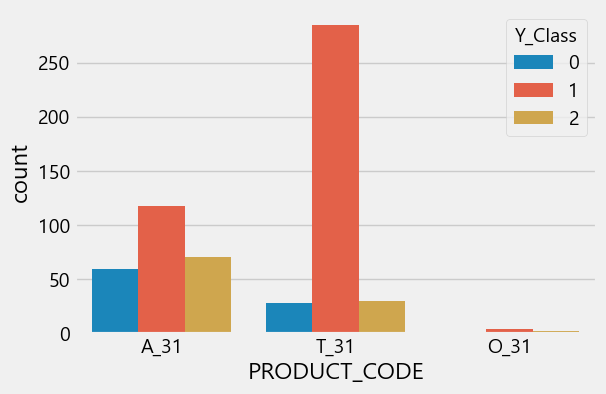

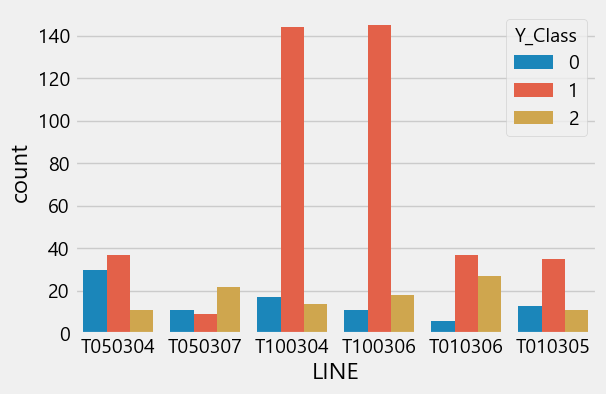

In [49]:
plt.figure(figsize=(6,4))
        
sns.countplot(data=train, x='PRODUCT_CODE', hue='Y_Class')

plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=train, x='LINE', hue='Y_Class')
plt.show() # 데이터들을 학습할때 입력변수가 line과 product_code 이기 때문에 해당 라인과 코드에 얼마나 정상적인 품질을 가지는지 그래프로 
#시각화했다.

- T100304와 T100306이 비교적 정상적인 제품이 많다.
- 제품 코드가 t_31인 상품이 비교적 정상적이다.

In [78]:
train_y=train["Y_Class"]
train_x=train.drop(["Y_Class","Y_Quality","TIMESTAMP"],axis=1)
train_x 

,PRODUCT_ID,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.34,40.89,32.56,34.09,77.77,0.0,0.0,0.0,0.0,0.0
1,TRAIN_001,T050307,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.89,42.82,43.92,35.34,72.55,0.0,0.0,0.0,0.0,0.0
2,TRAIN_002,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.19,36.65,42.47,36.53,78.35,0.0,0.0,0.0,0.0,0.0
3,TRAIN_003,T050307,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.74,39.17,52.17,30.58,71.78,0.0,0.0,0.0,0.0,0.0
4,TRAIN_004,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.70,41.89,46.93,33.09,76.97,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,T100306,T_31,2.0,95.0,0.0,45.0,10.0,0.0,50.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
594,TRAIN_594,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.47,53.07,50.89,55.10,66.49,1.0,0.0,0.0,0.0,0.0
595,TRAIN_595,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,1.0,0.0,0.0,0.0,0.0
596,TRAIN_596,T100304,O_31,40.0,94.0,0.0,45.0,11.0,0.0,45.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0


In [77]:
train_x=train_x.fillna(value=0,inplace=True)#데이터전처리하기위해 null값을 전부 0으로 처리하였다.
train_x


AttributeError: 'NoneType' object has no attribute 'fillna'

- 변수(product_code,line)에 따라서 Y_Class를 유추해보는 인공지능을 만들것이다. 
- 서로 다른 feature들의 크기를 통일하기위해 사이킷런 StandScaler클래스를 이용해보겠다.(평균0 분산1인 정규분포형태로만들어줌)

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [83]:
scaler=StandardScaler() #객체생성
scaler.fit(train_x[train_x.columns[3:]])

train_x_scaled=scaler.transform(train_x[train_x.columns[3:]])
train_x_df_scaled=pd.DataFrame(data=train_x_scaled)
train_x_df_scaled          #스케일링 완료

,0,1,2,3,4,5,6,7,8,9,...,2865,2866,2867,2868,2869,2870,2871,2872,2873,2874
0,-0.302348,-1.181260,0.0,-1.183895,-1.180768,0.0,-1.172670,-1.183243,-1.102091,-1.183895,...,1.608668,1.574442,1.294833,1.297452,2.671373,-0.445418,0.0,0.0,0.0,0.0
1,-0.302348,-1.181260,0.0,-1.183895,-1.180768,0.0,-1.172670,-1.183243,-1.102091,-1.183895,...,1.585198,1.669622,1.901036,1.361174,2.462073,-0.445418,0.0,0.0,0.0,0.0
2,-0.302348,-1.181260,0.0,-1.183895,-1.180768,0.0,-1.172670,-1.183243,-1.102091,-1.183895,...,1.600845,1.365342,1.823660,1.421838,2.694629,-0.445418,0.0,0.0,0.0,0.0
3,-0.302348,-1.181260,0.0,-1.183895,-1.180768,0.0,-1.172670,-1.183243,-1.102091,-1.183895,...,1.525219,1.489618,2.341280,1.118519,2.431199,-0.445418,0.0,0.0,0.0,0.0
4,-0.302348,-1.181260,0.0,-1.183895,-1.180768,0.0,-1.172670,-1.183243,-1.102091,-1.183895,...,1.575288,1.623758,2.061658,1.246474,2.639297,-0.445418,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0.127626,0.840168,0.0,0.844670,0.766018,0.0,0.885975,0.834377,1.265809,0.844670,...,-0.443122,-0.442094,-0.442664,-0.440386,-0.446886,-0.445418,0.0,0.0,0.0,0.0
594,-0.302348,-1.181260,0.0,-1.183895,-1.180768,0.0,-1.172670,-1.183243,-1.102091,-1.183895,...,2.137001,2.175113,2.272976,2.368498,2.219091,2.245084,0.0,0.0,0.0,0.0
595,-0.302348,-1.181260,0.0,-1.183895,-1.180768,0.0,-1.172670,-1.183243,-1.102091,-1.183895,...,-0.443122,-0.442094,-0.442664,-0.440386,-0.446886,2.245084,0.0,0.0,0.0,0.0
596,8.297142,0.818890,0.0,0.844670,0.960697,0.0,0.680110,0.834377,0.309542,0.844670,...,-0.443122,-0.442094,-0.442664,-0.440386,-0.446886,-0.445418,0.0,0.0,0.0,0.0
